# Linear Regression Model with FDR Control Process

## Preparation

In [1]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Read and view the data
data = pd.read_csv("fundamentals.csv")

# Remove any NA value in the dataset
data = data.dropna()

## 1. Data Exploration and Visualization

To explore the data, I checked the dependent variable which is Estimated Share Outstanding and other metrics from the 10-K showing information from different perspective.

### Estimated Share Outstanding

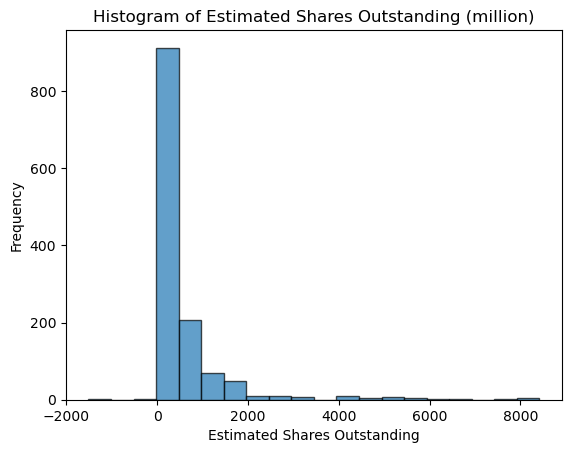

In [2]:
# Histogram of Estimated Share Outstanding
plt.hist(data['Estimated Shares Outstanding']/1000000, bins=20, edgecolor='black', alpha=0.7)
plt.title("Histogram of Estimated Shares Outstanding (million)")
plt.xlabel("Estimated Shares Outstanding")
plt.ylabel("Frequency")
plt.show()

From this histogram, we can find that the distribution of estimated shares outstanding is right-skewed. Most of the estimated shares outstanding concentrate in the range from 0 to 2000 million shares. 
### Revenue, Cost, and Profit

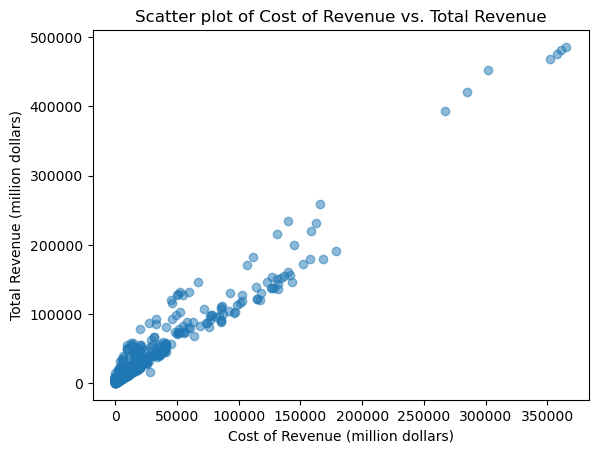

In [3]:
# Scatter plot of revenue vs cost
plt.scatter(data['Cost of Revenue']/1000000, data['Total Revenue']/1000000, alpha=0.5)
plt.title("Scatter plot of Cost of Revenue vs. Total Revenue")
plt.xlabel("Cost of Revenue (million dollars)")
plt.ylabel("Total Revenue (million dollars)")
plt.show()

The relationship between cost of revenue and total revenue is clearly shown by this scatter plot. They have positive correlation which means the higher the cost of revenue, the higher the total revenue.

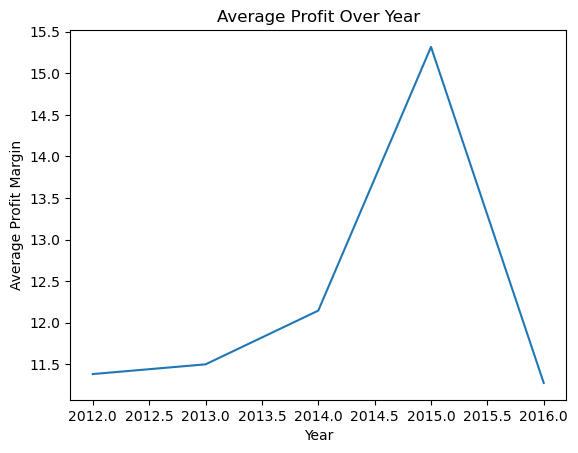

In [4]:
# Calculate Average profit trend over years
df_avg_profit = data.groupby('For Year')['Profit Margin'].mean().reset_index()
df_avg_profit

# Draw line chart for the data
plt.plot(df_avg_profit['For Year'], df_avg_profit['Profit Margin'])
plt.title("Average Profit Over Year")
plt.xlabel("Year")
plt.ylabel("Average Profit Margin")
plt.show()

Changes in average profit can be roughly divided into three stages: From 2012 to 2014, the average profit of all companies did not change much and rose slowly. From 2014 to 2015, the average profit grew rapidly while it dropped sharply to the level lower than 2012. This may be related to the overall market trend.
### Balance Sheet

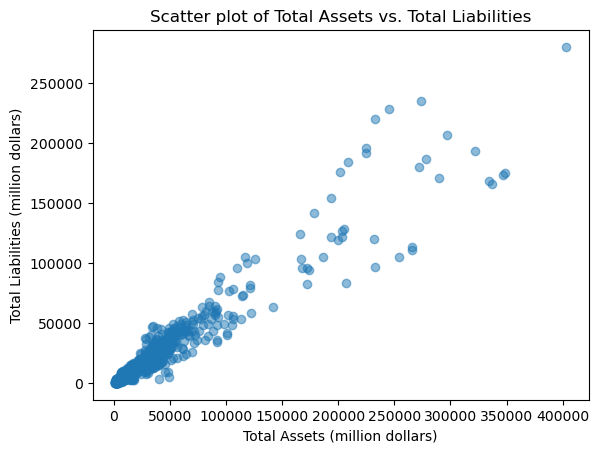

In [5]:
# Scatter plot of asset vs liability
# plt.figure(figsize=(10, 5))
plt.scatter(data['Total Assets']/1000000, data['Total Liabilities']/1000000, alpha=0.5)
plt.title("Scatter plot of Total Assets vs. Total Liabilities")
plt.xlabel("Total Assets (million dollars)")
plt.ylabel("Total Liabilities (million dollars)")
plt.show()

In terms of balance sheets, we concern about assets and liabilities and the ratio of them which show the company's ability to pay debts.From this scatter plot, we can see that most companies are clustered in the lower left corner, and the distribution of points gradually spreads toward the right and the top.
### Cash Flow

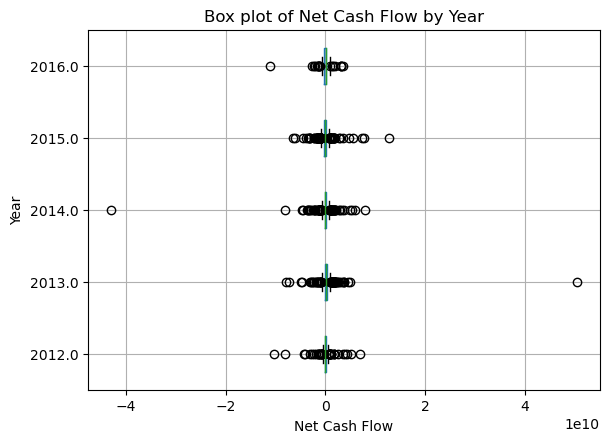

In [6]:
# Box plot of net cash flow by year
data.boxplot(column='Net Cash Flow', by='For Year', vert=False)
plt.title("Box plot of Net Cash Flow by Year")
plt.xlabel("Net Cash Flow")
plt.ylabel("Year")
plt.suptitle('')
plt.show()

Net cash flow is an important indicator to measure the company's operating model and status. This box plot illustrates that the average net cash flow of most companies every year is around 0, with some positive and some negative. There are outliers in year 2013 and 2014 or the boxes would be more clear in this plot.
### Earnings Per Share

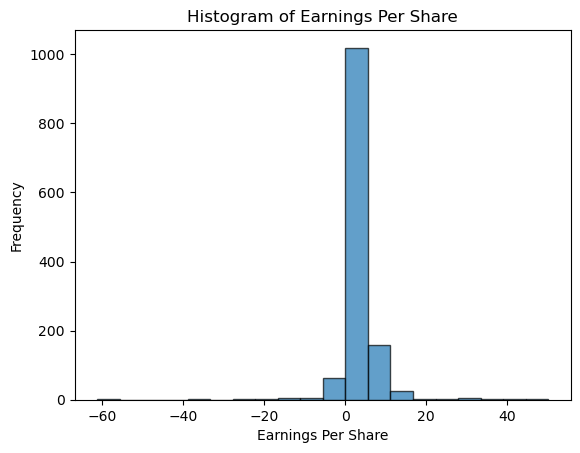

In [7]:
# Histogram of EPS
plt.hist(data['Earnings Per Share'], bins=20, edgecolor='black', alpha=0.7)
plt.title("Histogram of Earnings Per Share")
plt.xlabel("Earnings Per Share")
plt.ylabel("Frequency")
plt.show()

EPS reflect the earning performance of stocks and it could be either positive or negative. From this histogram, we could the distribution is not normal and most of the values concentrate in the range from -5 to 20.
## 2. Linear Regression Model Development

In [8]:
# Drop the dependent variable and the columns that can't be independent variables
X = data.drop(['Ticker Symbol','Period Ending','Estimated Shares Outstanding'], axis=1)
y = data['Estimated Shares Outstanding']
x = sm.add_constant(X)

# Build the linear regression model
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     Estimated Shares Outstanding   R-squared:                       0.856
Model:                                      OLS   Adj. R-squared:                  0.847
Method:                           Least Squares   F-statistic:                     98.35
Date:                          Sun, 21 Jan 2024   Prob (F-statistic):               0.00
Time:                                  23:12:50   Log-Likelihood:                -27499.
No. Observations:                          1299   AIC:                         5.515e+04
Df Residuals:                              1224   BIC:                         5.554e+04
Df Model:                                    74                                         
Covariance Type:                      nonrobust                                         
=======================================================================================================================
                                                          coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------
const                                                2.236e+10   2.02e+10      1.110      0.267   -1.72e+10    6.19e+10
Accounts Payable                                     -189.6240    239.715     -0.791      0.429    -659.923     280.675
Accounts Receivable                                    -0.0561      0.057     -0.980      0.327      -0.168       0.056
Add'l income/expense items                              0.0397      0.057      0.699      0.485      -0.072       0.151
After Tax ROE                                       -6.791e+05   4.98e+05     -1.362      0.173   -1.66e+06    2.99e+05
Capital Expenditures                                    1.0796      2.384      0.453      0.651      -3.598       5.758
Capital Surplus                                         0.0149      0.009      1.646      0.100      -0.003       0.033
Cash Ratio                                           6.533e+05   3.73e+05      1.751      0.080   -7.87e+04    1.39e+06
Cash and Cash Equivalents                              -0.0654      0.481     -0.136      0.892      -1.009       0.878
Changes in Inventories                                 -0.0696      0.060     -1.153      0.249      -0.188       0.049
Common Stocks                                          -0.0036      0.010     -0.370      0.711      -0.023       0.015
Cost of Revenue                                        -0.2573      0.173     -1.488      0.137      -0.597       0.082
Current Ratio                                       -2.248e+05   2.93e+05     -0.768      0.443   -7.99e+05    3.49e+05
Deferred Asset Charges                                  0.8029      0.267      3.009      0.003       0.279       1.326
Deferred Liability Charges                              0.0553      0.095      0.584      0.559      -0.130       0.241
Depreciation                                           -0.0775      0.057     -1.365      0.173      -0.189       0.034
Earnings Before Interest and Tax                       23.5586     39.319      0.599      0.549     -53.582     100.700
Earnings Before Tax                                   -23.8967     39.319     -0.608      0.543    -101.037      53.243
Effect of Exchange Rate                                -0.0829      0.168     -0.495      0.621      -0.412       0.246
Equity Earnings/Loss Unconsolidated Subsidiary          0.1127      0.081      1.390      0.165      -0.046       0.272
Fixed Assets                                            0.8058      0.266      3.028      0.003       0.284       1.328
Goodwill                                                0.8006      0.266      3.004      0.0

Besides the dependent variable, I dropped the column of Ticker Symbol and Period Ending because they are not suitable to be the independent variable. Then, I build the linear regression model on Estimated Shares Outstanding. From the summary table, we can see that is model is overall valid and it could explain 85.6% of the variation of the independent variable.

## 3. Multicollinearity in Linear Regression

Multicollinearity happens when two or more independent variables are high correlated with each other. It affects the interpretation of coefficients because it makes the estimation of individual coefficients unstable, which means small changes in the data can lead to large variations in the estimated coefficients. The sign of the coefficient may also be different from the original assumption.

Also, Multicollinearity tends to inflate the standard errors of the regression coefficients. Larger standard errors mean wider confidence intervals, making it harder to determine whether a coefficient is significantly different from zero. This, in turn, may result in the omission of variables that are actually important.

What's more, it becomes challenging to identify the contribution of each variable to the model. The coefficients may reflect the joint effect of correlated variables rather than their individual impacts. And since the coefficient is not stable, the p-value of each variable may also be unstable, misleading the importance of each variable. 

## 4. P-Value Analysis and Histogram

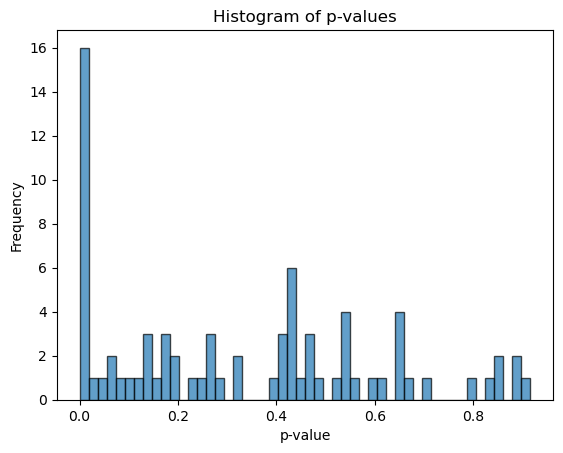

In [9]:
# Extract p values from the results
output = results.pvalues

# Set the histogram of p-values
plt.hist(output, bins=50, edgecolor='black', alpha=0.7)
plt.title("Histogram of p-values")
plt.xlabel("p-value")
plt.ylabel("Frequency")
plt.show()

The distribution of the p-values in this model is right-skewed. It suggests that some independent variables may have statistically significant impacts on the dependent variable, while others might lack significant explanatory power. In this regression model, about 16 independent variables are extremly significant since their p-values are around 0.

## 5. False Discovery Rate Control with BH Procedure

Alpha: 0.019576186010904672


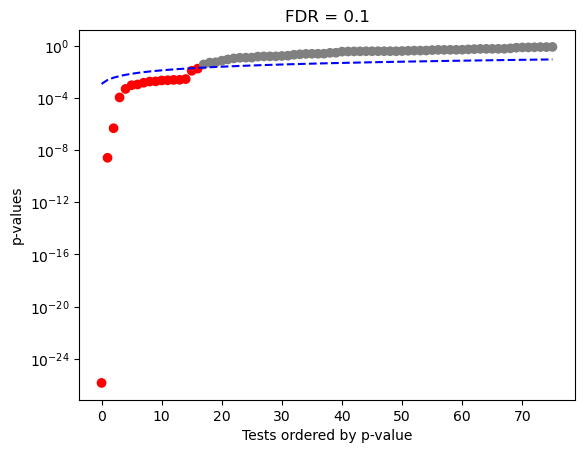

In [10]:
# Define the FDR function

def fdr(pvals, q, plotit=False):
  # Remove NA values
  pvals = np.array(pvals)
  pvals = pvals[~np.isnan(pvals)]
  N = len(pvals)
  
  # Sort the p-values and calculate the FDR threshold
  sorted_pvals = np.sort(pvals)
  k = np.arange(1, N+1)
  fdr_threshold = (q * k) / N
  
  # Find the last p-value that is below the FDR threshold
  below_threshold = sorted_pvals <= fdr_threshold
  max_index = np.max(np.where(below_threshold)) if np.any(below_threshold) else 0
  alpha = sorted_pvals[max_index]
  print(f"Alpha: {alpha}")
  
  # Optional plot
  if plotit:
    plt.scatter(range(N), sorted_pvals, c=np.where(sorted_pvals <= alpha, 'red', 'grey'), marker='o')
    plt.yscale('log')
    plt.plot(range(N), fdr_threshold, linestyle='--', color='blue')
    plt.xlabel("Tests ordered by p-value")
    plt.ylabel("p-values")
    plt.title(f"FDR = {q}")
    plt.show()
  
  return alpha

# Use the function with the p-value output
alpha_threshold = fdr(output, 0.1, plotit=True)

In [11]:
# Compare p-values with alpha_threshold and count the significant variable
count = (output <= alpha_threshold).sum().sum()
count

17

## 6. Sensitivity Analysis of FDR Control
### When q = 0.05

Alpha: 0.003098105546237518


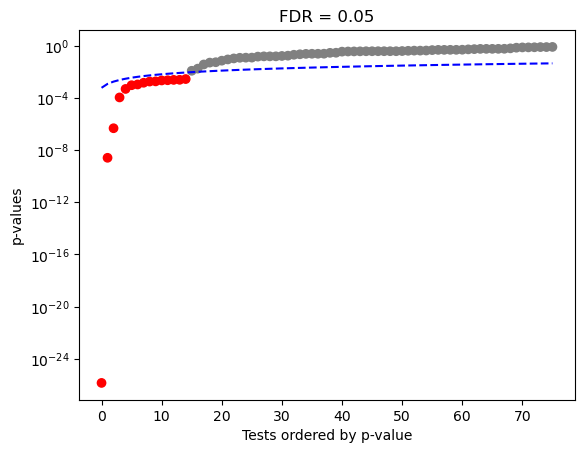

In [12]:
# Apply the BH procedure at q=0.05
alpha_1 = fdr(output, 0.05, plotit=True)

In [13]:
# Compare p-values with alpha_threshold and count the significant variable
count_1 = (output <= alpha_1).sum().sum()
count_1

15

### When q = 0.02

Alpha: 0.003098105546237518


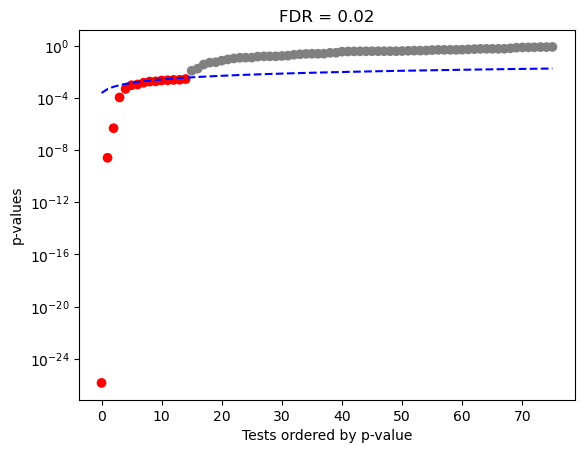

In [14]:
# Apply the BH procedure at q=0.01
alpha_2 = fdr(output, 0.02, plotit=True)

In [15]:
# Compare p-values with alpha_threshold and count the significant variable
count_2 = (output <= alpha_2).sum().sum()
count_2

15

Alpha: 0.000538425695068524


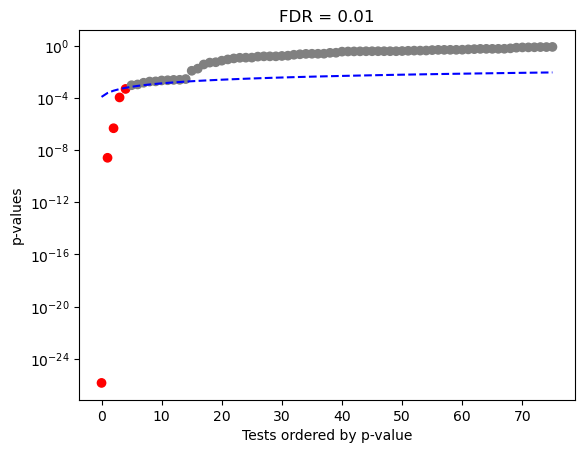

In [16]:
# Apply the BH procedure at q=0.01
alpha_3 = fdr(output, 0.01, plotit=True)

In [17]:
# Compare p-values with alpha_threshold and count the significant variable
count_3 = (output <= alpha_3).sum().sum()
count_3

5

### Conclusion
When q=0.1, there are 17 "true" discoveries in the model, and the number falls to 15 when q=0.05 or q=0.02. So we can say the robustness of the model is quite good when q is from 0.02 to 0.1. However, when I change the q to 0.01, the number of significant variable drops to 5, showing the model is not robust when the q-value is small.

## 7. Exploring Interaction Terms
### Build the Model

In [18]:
# Import packages
from sklearn.preprocessing import PolynomialFeatures

# Extract the first 25 variables in the dataset
X = data.iloc[:, 2:27]
y = data['Estimated Shares Outstanding']

# Generate the interactions
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)
X_poly = sm.add_constant(X_poly)

# Build the regression model with interactions
model = sm.OLS(y, X_poly).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     Estimated Shares Outstanding   R-squared:                       0.944
Model:                                      OLS   Adj. R-squared:                  0.926
Method:                           Least Squares   F-statistic:                     52.58
Date:                          Sun, 21 Jan 2024   Prob (F-statistic):               0.00
Time:                                  23:12:51   Log-Likelihood:                -26886.
No. Observations:                          1299   AIC:                         5.440e+04
Df Residuals:                               983   BIC:                         5.604e+04
Df Model:                                   315                                         
Covariance Type:                      nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003      0.000      1.427      0.154      -0.000       0.001
x1            -0.0745      0.046     -1.625      0.104      -0.164       0.015
x2            -0.5031      0.286     -1.761      0.078      -1.064       0.057
x3             0.0701      0.268      0.261      0.794      -0.456       0.596
x4            -0.0008      0.000     -1.670      0.095      -0.002       0.000
x5             0.0224      0.097      0.232      0.816      -0.167       0.212
x6             0.0555      0.021      2.653      0.008       0.014       0.097
x7            -0.0002      0.000     -0.584      0.559      -0.001       0.000
x8            -0.0256      0.058     -0.439      0.661      -0.140       0.089
x9            -0.1979      0.498     -0.397      0.691      -1.175       0.779
x10           -0.0107      0.049     -0.216      0.829      -0.107       0.086
x11           -0.0083      0.009     -0.915      0.361      -0.026       0.010
x12            0.0004      0.000      1.088      0.277      -0.000       0.001
x13            0.2472      0.121      2.039      0.042       0.009       0.485
x14           -0.0321      0.060     -0.536      0.592      -0.149       0.085
x15            0.0631      0.152      0.416      0.678      -0.235       0.361
x16            0.3866      0.289      1.337      0.182      -0.181       0.954
x17           -0.4344      0.281     -1.545      0.123      -0.986       0.117
x18           -0.0022      0.024     -0.090      0.928      -0.050       0.045
x19           -0.1968      0.125     -1.576      0.115      -0.442       0.048
x20            0.0081      0.020      0.415      0.679      -0.030       0.047
x21            0.0616      0.029      2.150      0.032       0.005       0.118
x22           -0.0002      0.000     -0.832      0.405      -0.001       0.000
x23            0.0314      0.089      0.352      0.725      -0.144       0.206
x24            0.2761      0.301      0.917      0.359      -0.315       0.867
x25           -0.1619      0.045     -3.614      0.000      -0.250      -0.074
x26         4.131e-12   1.92e-12      2.151      0.032    3.62e-13     7.9e-12
x27         5.783e-12   1.71e-11      0.337      0.736   -2.79e-11    3.94e-11
x28         4.677e-11   4.58e-11      1.021      0.308   -4.31e-11    1.37e-10
x29            0.0004      0.000      1.451      0.147      -0.000       0.001
x30         4.257e-11   1.69e-11      2.526      0.012    9.49e-12    7.57e-11
x31         1.085e-12   3.53e-12      0.307      0.759   -5.85e-12    8.02e-12
x32            0.0002      0.000      0.528      0.598      -0.001       0.001
x33        -3.923e-12   6.16e-12     -0.637      0.524    -1.6e-11    8.17e-12
x34         2.332e-13   2.04e-11      0.011      0

### Why interactions are important
Interactions are important because they refer to the mutual effects between two or more independent variables. Introducing interaction terms into a regression model allows for the consideration of joint effects among independent variables, capturing not only their individual impacts but also their interdependence. Adding interactions to the model may help capture nonlinear relationships between independent variables and correct issues related to collinearity, making the model more accurate.

## 8. Model Evaluation with Interaction Terms
### F-statistics
F-statistics shows the overall significance of the model. F-statistics of the original model is 98.35 while F-statistics of the new model is 52.58, showing that both models are significant.

### R-squared and Adj. R-squared
R-squared of the original model: 0.856; R-squared of the new model: 0.944

Adj. R-squared of the original model: 0.847; Adj. R-squared of the new model: 0.926

From this perspective, we can see that the new model with interactions perfroms better because it can explain larger proportion of the variation in the dependent variable. It's consistent with the benifit of interactions that they help explain the mutual effects between two or more independent variables.

### AIC and BIC
AIC of the original model: 5.515e+04; AIC of the new model: 5.440e+04

BIC of the original model: 5.554e+04; BIC of the new model: 5.604e+04

AIC and BIC are information criteria that aim to fit a good model while taking into account the complexity of the model. Smaller AIC or BIC values indicate a better model. The AICs and BICs are samll enough in both two models.

### Conclusion
The main difference of the two models' performance is that the new model with interactions perform better in terms of R-squared, showing that it can explain the variation in the dependent variable better than the original one.

## 9. FDR Analysis with Interaction Terms
### Histogram of p-values for the new model

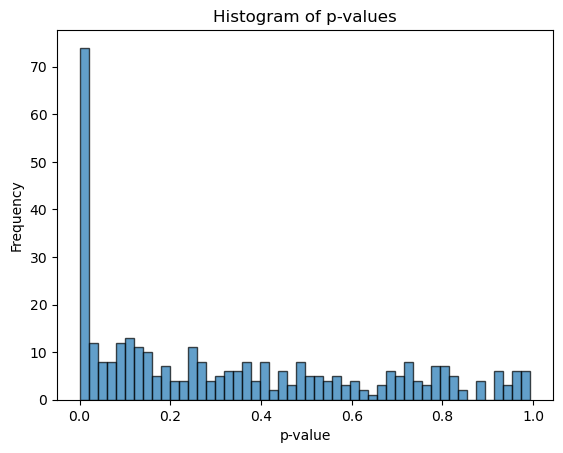

In [19]:
# Extract p-values from the new result
p_values_new = model.pvalues

# Plot the histogram
plt.hist(p_values_new, bins=50, edgecolor='black', alpha=0.7)
plt.title("Histogram of p-values")
plt.xlabel("p-value")
plt.ylabel("Frequency")
plt.show()

In the new model, the p-values of more variables are clustered around 0, indicating that the number of significant variables has increased. In addition, the p-value distribution is more even in other value regions.

### FDR control with BH procedure

Alpha: 0.019984840990269512


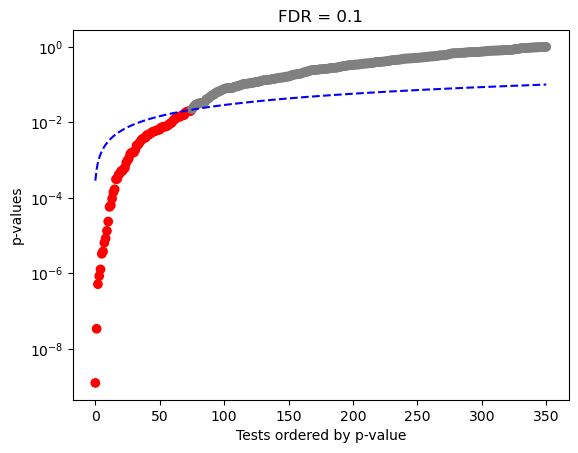

In [20]:
# Apply the FDR function to new p-value result
alpha_new = fdr(p_values_new, 0.1, plotit=True)

In [21]:
# Compare p-values with alpha_threshold and count the significant variable
count_new = (p_values_new <= alpha_new).sum().sum()
count_new

75

### Comparison with the original model
With the same q=0.1, the threshold of alpha is about 0.02 in both regression model. However, the number of significant predictors in the model with interactions is 75, which is far more than the significant predictors in the original model. It shows that in the new model, more variables become significant and can better explain the dependent variable, which is consistant with the larger R-squared in the new model.